<a href="https://colab.research.google.com/github/moch1996/Vaycold/blob/main/Python_DataAnalysis/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD_2020%EB%85%84%EB%8F%84_%ED%96%89%EB%B3%B5%EC%A7%80%EC%88%98_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [235]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
df = dict()
df['2015'] = pd.read_csv('2015.csv')
df['2016'] = pd.read_csv('2016.csv')
df['2017'] = pd.read_csv('2017.csv')
df['2018'] = pd.read_csv('2018.csv')
df['2019'] = pd.read_csv('2019.csv')
df['2020'] = pd.read_csv('2020.csv')

In [237]:
df['2015'].head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# 데이터 프레임 구성하기

In [238]:
# 연도별 데이터 표준화하기

In [239]:
for key in df :
  print(key, df[key].columns)  # 각 데이터 프레임의 컬럼확인


  # 보면 모양이 조금씩 다름

2015 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expe

In [240]:
# 각 년도별로 다른 정보를 가진 데이터 프레임의 컬럼을 동일하게 표준화하기

In [241]:
cols = ['country', 'score', 'economy', 'family', 'health', 'freedom','trust', 'generosity', 'residual']

In [242]:
df['2015'].drop( ['Region', 'Happiness Rank','Standard Error'], axis = 1, inplace=True)

In [243]:
df['2016'].drop(['Region', 'Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval'], axis=1, inplace=True)

In [244]:
df['2017'].drop(['Happiness.Rank', 'Whisker.low', 'Whisker.high'], axis=1, inplace= True) # generosity, trust 순서반대

In [245]:
df['2018'].drop(['Overall rank'], axis=1, inplace= True) # generosity, trust 순서반대, residual 없음

In [246]:
df['2019'].drop(['Overall rank'], axis=1, inplace= True) # generosity, trust 순서반대, residual 없음

In [247]:
df['2020'].drop(['Regional indicator', 
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia'], axis=1, inplace= True) # generosity, trust 순서반대

In [248]:
# 2018이랑 2019는 잔차가 없는데 만들어주자
df['2018'].head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [249]:
df['2018'].columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [250]:
df['2018']['residual'] = df['2018']['Score'] - df['2018'][['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis =1)
df['2019']['residual'] = df['2019']['Score'] - df['2019'][['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis =1)

In [251]:
# 이제 generosity랑 trust를 바꿔주자
# 근데 4개를 바꾸느니 2개를 바꾸는 게 낫지 않을까
# 그래서 cols를 다음과 같이 재정의하자
cols = ['country', 'score', 'economy', 'family', 'health', 'freedom', 'generosity', 'trust', 'residual']

In [252]:
df['2015'].columns

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [253]:
df['2015'] = df['2015'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom',
       'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual']]

In [254]:
df['2016'].columns

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [255]:
df['2016'] = df['2016'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom',
       'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual']]

In [256]:
df['2016'].head()

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453,2.73939
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203,2.69463
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975,2.83137
3,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776,2.66465
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004,2.82596


In [257]:
# 자 한번 확인해보자

In [258]:
for key in df :
  print(key, df[key].columns, len(df[key].columns))  # 각 데이터 프레임의 컬럼확인


2015 Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object') 9
2016 Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object') 9
2017 Index(['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object') 9
2018 Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'residual'],
      dtype='object') 9
2019 Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healt

In [259]:
# 미리 지어놨던 컬럼즈로 이름을 바꿔줍시당
for col_name in df : 
  df[col_name].columns = cols

In [260]:
df['2015'].head()

,country,score,economy,family,health,freedom,generosity,trust,residual
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176


In [261]:
df['2016'].head()

,country,score,economy,family,health,freedom,generosity,trust,residual
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453,2.73939
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203,2.69463
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975,2.83137
3,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776,2.66465
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004,2.82596


# 하나의 데이터로 합치기

In [262]:
df_all = pd.concat(df, axis =0) # axis = 0을 주면 옆으로 이어붙이는게 아니라 위에서 아래로 이어붙이게
df_all

country   score  ...     trust  residual
2015 0                 Switzerland  7.5870  ...  0.419780  2.517380
     1                     Iceland  7.5610  ...  0.141450  2.702010
     2                     Denmark  7.5270  ...  0.483570  2.492040
     3                      Norway  7.5220  ...  0.365030  2.465310
     4                      Canada  7.4270  ...  0.329570  2.451760
...                            ...     ...  ...       ...       ...
2020 148  Central African Republic  3.4759  ...  0.028265  2.860198
     149                    Rwanda  3.3123  ...  0.485542  0.548445
     150                  Zimbabwe  3.2992  ...  0.080929  0.841031
     151               South Sudan  2.8166  ...  0.111157  1.378751
     152               Afghanistan  2.5669  ...  0.001226  1.507236

[935 rows x 9 columns]

In [263]:
df_all.index.names = ['year', 'rank']
df_all

country   score  ...     trust  residual
year rank                                    ...                    
2015 0                  Switzerland  7.5870  ...  0.419780  2.517380
     1                      Iceland  7.5610  ...  0.141450  2.702010
     2                      Denmark  7.5270  ...  0.483570  2.492040
     3                       Norway  7.5220  ...  0.365030  2.465310
     4                       Canada  7.4270  ...  0.329570  2.451760
...                             ...     ...  ...       ...       ...
2020 148   Central African Republic  3.4759  ...  0.028265  2.860198
     149                     Rwanda  3.3123  ...  0.485542  0.548445
     150                   Zimbabwe  3.2992  ...  0.080929  0.841031
     151                South Sudan  2.8166  ...  0.111157  1.378751
     152                Afghanistan  2.5669  ...  0.001226  1.507236

[935 rows x 9 columns]

In [264]:
# 원하는 형태의 데이터로 변형하기

In [265]:
df_all.reset_index(inplace = True)

In [266]:
df_all

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
0,2015,0,Switzerland,7.5870,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2.517380
1,2015,1,Iceland,7.5610,1.302320,1.402230,0.947840,0.628770,0.436300,0.141450,2.702010
2,2015,2,Denmark,7.5270,1.325480,1.360580,0.874640,0.649380,0.341390,0.483570,2.492040
3,2015,3,Norway,7.5220,1.459000,1.330950,0.885210,0.669730,0.346990,0.365030,2.465310
4,2015,4,Canada,7.4270,1.326290,1.322610,0.905630,0.632970,0.458110,0.329570,2.451760
...,...,...,...,...,...,...,...,...,...,...,...
930,2020,148,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
931,2020,149,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
932,2020,150,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
933,2020,151,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [267]:
df_all['rank'] += 1
df_all

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
0,2015,1,Switzerland,7.5870,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2.517380
1,2015,2,Iceland,7.5610,1.302320,1.402230,0.947840,0.628770,0.436300,0.141450,2.702010
2,2015,3,Denmark,7.5270,1.325480,1.360580,0.874640,0.649380,0.341390,0.483570,2.492040
3,2015,4,Norway,7.5220,1.459000,1.330950,0.885210,0.669730,0.346990,0.365030,2.465310
4,2015,5,Canada,7.4270,1.326290,1.322610,0.905630,0.632970,0.458110,0.329570,2.451760
...,...,...,...,...,...,...,...,...,...,...,...
930,2020,149,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
931,2020,150,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
932,2020,151,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
933,2020,152,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


# 피벗테이블을 이용하여 데이터 프레임재구성하기

In [268]:
rank_table = df_all.pivot(index = 'country', columns = 'year', values = 'rank')
rank_table

# 소팅이 필요함

year,2015,2016,2017,2018,2019,2020
country,,,,,,
Afghanistan,153.0,154.0,141.0,145.0,154.0,153.0
Albania,95.0,109.0,109.0,112.0,107.0,105.0
Algeria,68.0,38.0,53.0,84.0,88.0,100.0
Angola,137.0,141.0,140.0,142.0,NaN,NaN
Argentina,30.0,26.0,24.0,29.0,47.0,55.0
...,...,...,...,...,...,...
Venezuela,23.0,44.0,82.0,102.0,108.0,99.0
Vietnam,75.0,96.0,94.0,95.0,94.0,83.0
Yemen,136.0,147.0,146.0,152.0,151.0,146.0


In [269]:
# 데이터프레임에 소팅에는 두 가지 방법이 있음
# 1. 인덱스를 가지고 소팅하는 방법
# 2. 밸류를 가지고 소팅하는 방법
rank_table.sort_values('2020', inplace = True) #2020년을 기준으로 할 거라는 의미
rank_table

year,2015,2016,2017,2018,2019,2020
country,,,,,,
Finland,6.0,5.0,5.0,1.0,1.0,1.0
Denmark,3.0,1.0,2.0,3.0,2.0,2.0
Switzerland,1.0,2.0,4.0,5.0,6.0,3.0
Iceland,2.0,3.0,3.0,4.0,4.0,4.0
Norway,4.0,4.0,1.0,2.0,3.0,5.0
...,...,...,...,...,...,...
Sudan,118.0,133.0,130.0,137.0,NaN,NaN
Suriname,40.0,40.0,NaN,NaN,NaN,NaN
Syria,156.0,156.0,152.0,150.0,149.0,NaN


In [270]:
rank_table.head(20)

year,2015,2016,2017,2018,2019,2020
country,,,,,,
Finland,6.0,5.0,5.0,1.0,1.0,1.0
Denmark,3.0,1.0,2.0,3.0,2.0,2.0
Switzerland,1.0,2.0,4.0,5.0,6.0,3.0
Iceland,2.0,3.0,3.0,4.0,4.0,4.0
Norway,4.0,4.0,1.0,2.0,3.0,5.0
Netherlands,7.0,7.0,6.0,6.0,5.0,6.0
Sweden,8.0,10.0,9.0,9.0,7.0,7.0
New Zealand,9.0,8.0,8.0,8.0,8.0,8.0
Austria,13.0,12.0,13.0,12.0,10.0,9.0


In [271]:
# loc 용법을 확실히 익혀야 겠다
# 하나씩 생각해보자

rank_table['2020'].dropna() # 이것은 2020년 결측값을 제거한 순서대로 되있다 왜냐하면 소팅을 그렇게 하였으므로

country
Finland                       1.0
Denmark                       2.0
Switzerland                   3.0
Iceland                       4.0
Norway                        5.0
                            ...  
Central African Republic    149.0
Rwanda                      150.0
Zimbabwe                    151.0
South Sudan                 152.0
Afghanistan                 153.0
Name: 2020, Length: 153, dtype: float64

In [272]:
rank_table['2020'].dropna().index # 이 인덱스 값은 각 나라를 지칭한다. array형식으로 나타나게 된다

Index(['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Norway', 'Netherlands',
       'Sweden', 'New Zealand', 'Austria', 'Luxembourg',
       ...
       'India', 'Malawi', 'Yemen', 'Botswana', 'Tanzania',
       'Central African Republic', 'Rwanda', 'Zimbabwe', 'South Sudan',
       'Afghanistan'],
      dtype='object', name='country', length=153)

In [273]:
rank_table['2020'].dropna().index[0] # 즉 여기서 첫번째 값은 첫번째 랭크인 핀란드 나라가 선택된다.

'Finland'

In [274]:
# 이제 loc을 써보자

rank_table.loc['Finland'] # 이렇게하면 인덱스 = 핀란드인 값들을 가져올 수 있음


year
2015    6.0
2016    5.0
2017    5.0
2018    1.0
2019    1.0
2020    1.0
Name: Finland, dtype: float64

In [275]:
rank_table.loc[rank_table['2020'].dropna().index[0]]

year
2015    6.0
2016    5.0
2017    5.0
2018    1.0
2019    1.0
2020    1.0
Name: Finland, dtype: float64

# 데이터 시각화 수행하기

In [276]:
# 년도별 순위 변화를 시각화하기

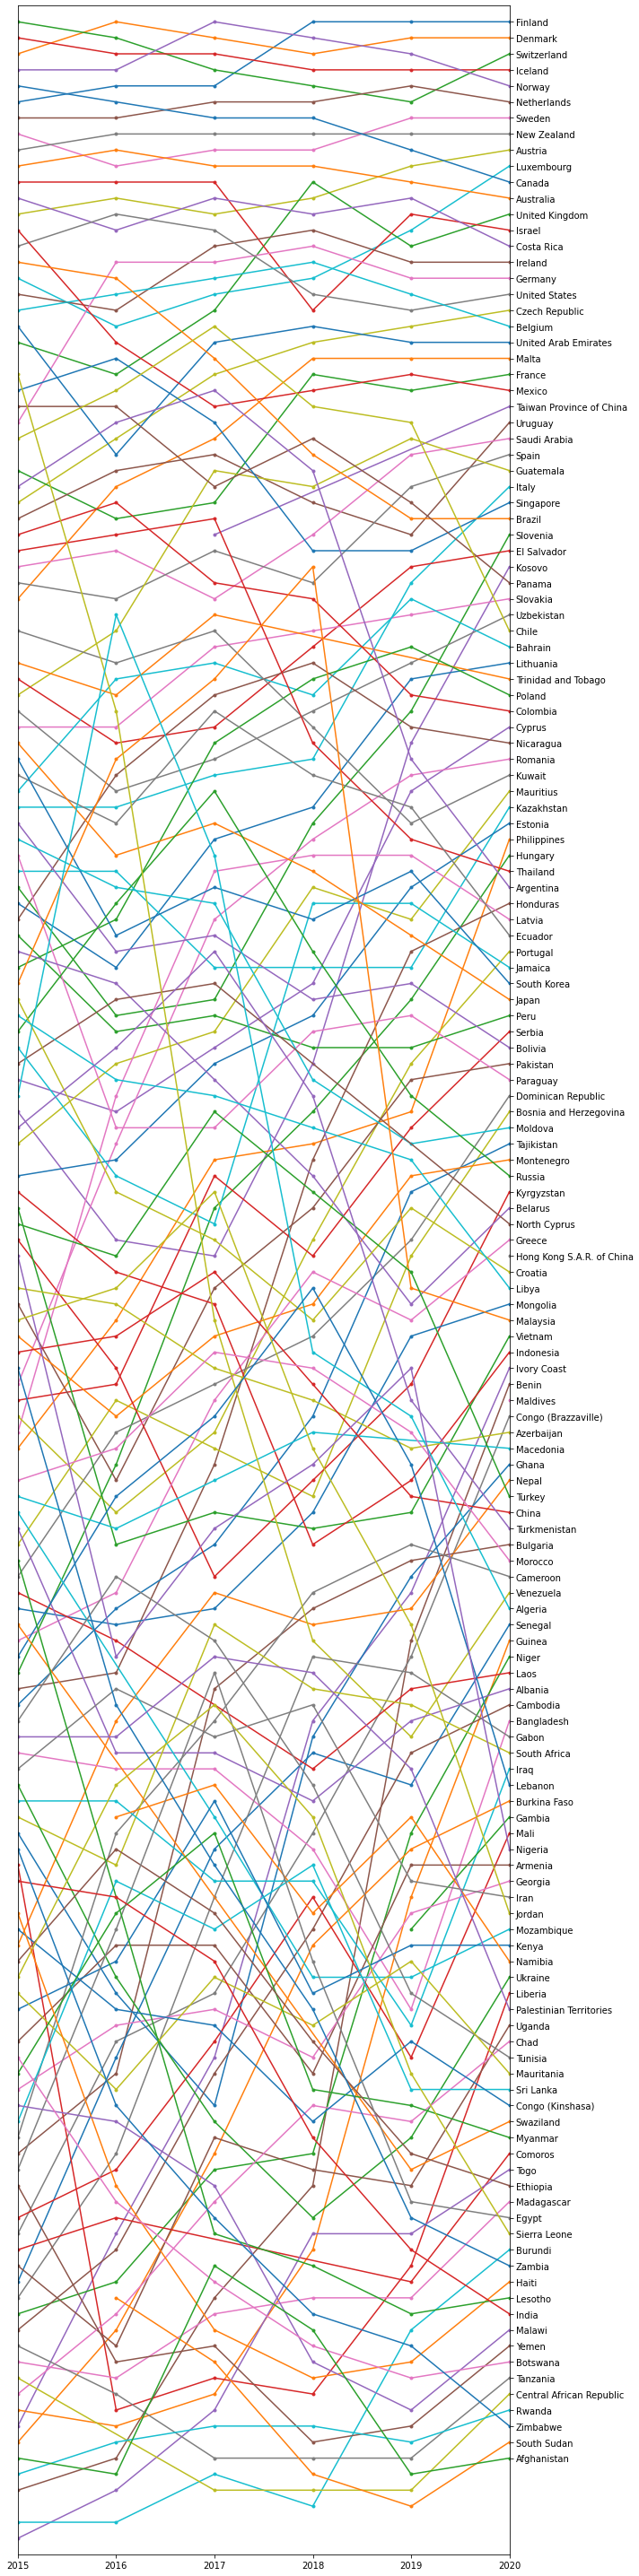

In [277]:
plt.figure(figsize=(10,40))
rank2020 = rank_table['2020'].dropna()
for c in rank2020.index :
  t = rank_table.loc[c].dropna()
  plt.plot(t.index, t,'.-') #여기서 인덱스값은 연도, t는 랭킹을 나타냄

plt.xlim(['2015','2020'])
plt.ylim([0,rank_table.max().max()+1])
plt.yticks(rank2020, rank2020.index) #어디에 찍을 것인지, 그리고 무엇을 찍을 것인지를 의미하는거같음
ax = plt.gca()
ax.invert_yaxis()
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
plt.tight_layout()
plt.show()

In [278]:
 #분야별로 나눠서 점수 시각화하기

In [279]:
df_all

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
0,2015,1,Switzerland,7.5870,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2.517380
1,2015,2,Iceland,7.5610,1.302320,1.402230,0.947840,0.628770,0.436300,0.141450,2.702010
2,2015,3,Denmark,7.5270,1.325480,1.360580,0.874640,0.649380,0.341390,0.483570,2.492040
3,2015,4,Norway,7.5220,1.459000,1.330950,0.885210,0.669730,0.346990,0.365030,2.465310
4,2015,5,Canada,7.4270,1.326290,1.322610,0.905630,0.632970,0.458110,0.329570,2.451760
...,...,...,...,...,...,...,...,...,...,...,...
930,2020,149,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
931,2020,150,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
932,2020,151,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
933,2020,152,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [280]:
#누적합을 이용하자

In [281]:
#2020년에 상위 20개국만 보자

data = df_all[df_all['year']=='2020'] #2020년 데이터만 가져오기
data = data.loc[data.index[:20]] #랭크 상위 20개만 가져오기
data

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
782,2020,1,Finland,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
783,2020,2,Denmark,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
784,2020,3,Switzerland,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
785,2020,4,Iceland,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
786,2020,5,Norway,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
787,2020,6,Netherlands,7.4489,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117
788,2020,7,Sweden,7.3535,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
789,2020,8,New Zealand,7.2996,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
790,2020,9,Austria,7.2942,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
791,2020,10,Luxembourg,7.2375,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700


In [282]:
# economy ~ residual 까지 누적합을 해야되기 때문에
# 데이터를 떼오장

In [283]:
data[data.columns[4:]]

,economy,family,health,freedom,generosity,trust,residual
782,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
783,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
784,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
785,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
786,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
787,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117
788,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
789,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
790,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
791,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700


In [284]:
# cumsum을 통해 누적합을 해보자

data[data.columns[4:]].cumsum()

#뭐여 똑같은데 라고생각했는데 누적합이 아래로 내려가면서 됬네 axis = 1을 줘야 겠다

,economy,family,health,freedom,generosity,trust,residual
782,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
783,2.612138,3.002975,1.940604,1.327357,0.402464,0.973118,5.195576
784,4.002912,4.475379,2.981137,1.956311,0.671520,1.381063,7.545843
785,5.329414,6.022946,3.981981,2.618292,1.033850,1.525604,10.006531
786,6.753621,7.518119,4.990052,3.288493,1.321835,1.959705,12.174798
787,8.092568,8.981764,5.965728,3.902119,1.658152,2.328275,14.526915
788,9.414803,10.415112,6.952198,4.552417,1.930980,2.770341,16.773214
789,10.657121,11.902331,7.960337,5.199207,2.256707,3.231609,18.901322
790,11.974406,13.339775,8.961270,5.802576,2.512216,3.512865,21.299768
791,13.511082,14.727304,9.947713,6.412713,2.708170,3.879907,23.453468


In [285]:
d = data[data.columns[4:]].cumsum(axis = 1)
d

,economy,family,health,freedom,generosity,trust,residual
782,1.285190,2.784715,3.745987,4.408304,4.567974,5.045831,7.808666
783,1.326949,2.830398,3.809730,4.474770,4.717564,5.212824,7.645565
784,1.390774,2.863178,3.903711,4.532665,4.801721,5.209667,7.559934
785,1.326502,2.874069,3.874913,4.536893,4.899223,5.043764,7.504452
786,1.424207,2.919380,3.927452,4.597653,4.885638,5.319738,7.488005
787,1.338946,2.802592,3.778268,4.391894,4.728212,5.096781,7.448898
788,1.322235,2.755583,3.742053,4.392351,4.665179,5.107245,7.353545
789,1.242318,2.729536,3.737675,4.384465,4.710191,5.171459,7.299567
790,1.317286,2.754730,3.755664,4.359033,4.614543,4.895799,7.294245
791,1.536676,2.924204,3.910647,4.520784,4.716738,5.083780,7.237480


In [286]:
# 긴것부터 그려야 위에 차곡차곡 작은게 덮이므로 순서를 뒤집어주자
# 컬럼뒤집기 신기하다 기억하면 좋을듯

d  = d[d.columns[::-1]]
d

,residual,trust,generosity,freedom,health,family,economy
782,7.808666,5.045831,4.567974,4.408304,3.745987,2.784715,1.285190
783,7.645565,5.212824,4.717564,4.474770,3.809730,2.830398,1.326949
784,7.559934,5.209667,4.801721,4.532665,3.903711,2.863178,1.390774
785,7.504452,5.043764,4.899223,4.536893,3.874913,2.874069,1.326502
786,7.488005,5.319738,4.885638,4.597653,3.927452,2.919380,1.424207
787,7.448898,5.096781,4.728212,4.391894,3.778268,2.802592,1.338946
788,7.353545,5.107245,4.665179,4.392351,3.742053,2.755583,1.322235
789,7.299567,5.171459,4.710191,4.384465,3.737675,2.729536,1.242318
790,7.294245,4.895799,4.614543,4.359033,3.755664,2.754730,1.317286
791,7.237480,5.083780,4.716738,4.520784,3.910647,2.924204,1.536676


In [287]:
# 나라도 갖고와야징
d['country'] = data['country']
d.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,residual,trust,generosity,freedom,health,family,economy,country
782,7.808666,5.045831,4.567974,4.408304,3.745987,2.784715,1.285190,Finland
783,7.645565,5.212824,4.717564,4.474770,3.809730,2.830398,1.326949,Denmark
784,7.559934,5.209667,4.801721,4.532665,3.903711,2.863178,1.390774,Switzerland
785,7.504452,5.043764,4.899223,4.536893,3.874913,2.874069,1.326502,Iceland
786,7.488005,5.319738,4.885638,4.597653,3.927452,2.919380,1.424207,Norway


In [288]:
d

,residual,trust,generosity,freedom,health,family,economy,country
782,7.808666,5.045831,4.567974,4.408304,3.745987,2.784715,1.285190,Finland
783,7.645565,5.212824,4.717564,4.474770,3.809730,2.830398,1.326949,Denmark
784,7.559934,5.209667,4.801721,4.532665,3.903711,2.863178,1.390774,Switzerland
785,7.504452,5.043764,4.899223,4.536893,3.874913,2.874069,1.326502,Iceland
786,7.488005,5.319738,4.885638,4.597653,3.927452,2.919380,1.424207,Norway
787,7.448898,5.096781,4.728212,4.391894,3.778268,2.802592,1.338946,Netherlands
788,7.353545,5.107245,4.665179,4.392351,3.742053,2.755583,1.322235,Sweden
789,7.299567,5.171459,4.710191,4.384465,3.737675,2.729536,1.242318,New Zealand
790,7.294245,4.895799,4.614543,4.359033,3.755664,2.754730,1.317286,Austria
791,7.237480,5.083780,4.716738,4.520784,3.910647,2.924204,1.536676,Luxembourg


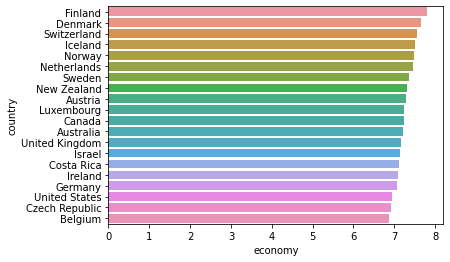

In [289]:
# 이제 그려보자

for c in d.columns[:-1] :
  sns.barplot(x=c, y='country', data=d, label = c) # label = c는 범례를 표현하기 위해 있음

  # 색깔을 정의하지 않아서 그냥 다 덮여버렸음

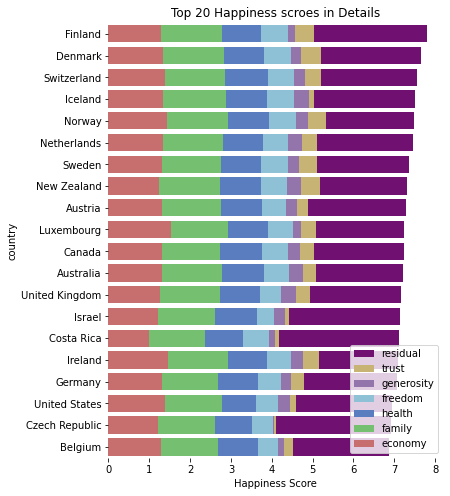

In [290]:
plt.figure(figsize=(6,8))

sns.set_color_codes('muted') # 색깔 톤다운 시키는법

colors = ['r', 'g','b','c','m','y','purple'][::-1]
for idx, c in enumerate(d.columns[:-1]) :
  sns.barplot(x=c, y='country', data=d, label = c, color = colors[idx]) 



plt.legend(loc = 'lower right')
plt.title('Top 20 Happiness scroes in Details')
plt.xlabel('Happiness Score')


sns.despine(left=True, bottom = True)

plt.show()

# 컬럼간의 상관성 파악하기

In [291]:
 # Column간의 상관성 시각화하기

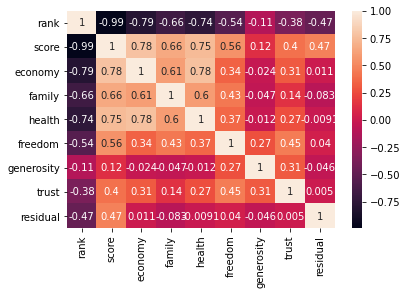

In [292]:
sns.heatmap(df_all.corr(), annot= True)

#랭크르 지워보고 다시해보자

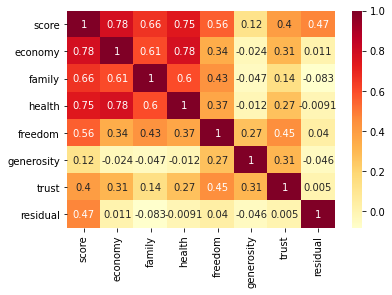

In [293]:
sns.heatmap(df_all.drop('rank', axis=1).corr(), annot =True, cmap = 'YlOrRd') 

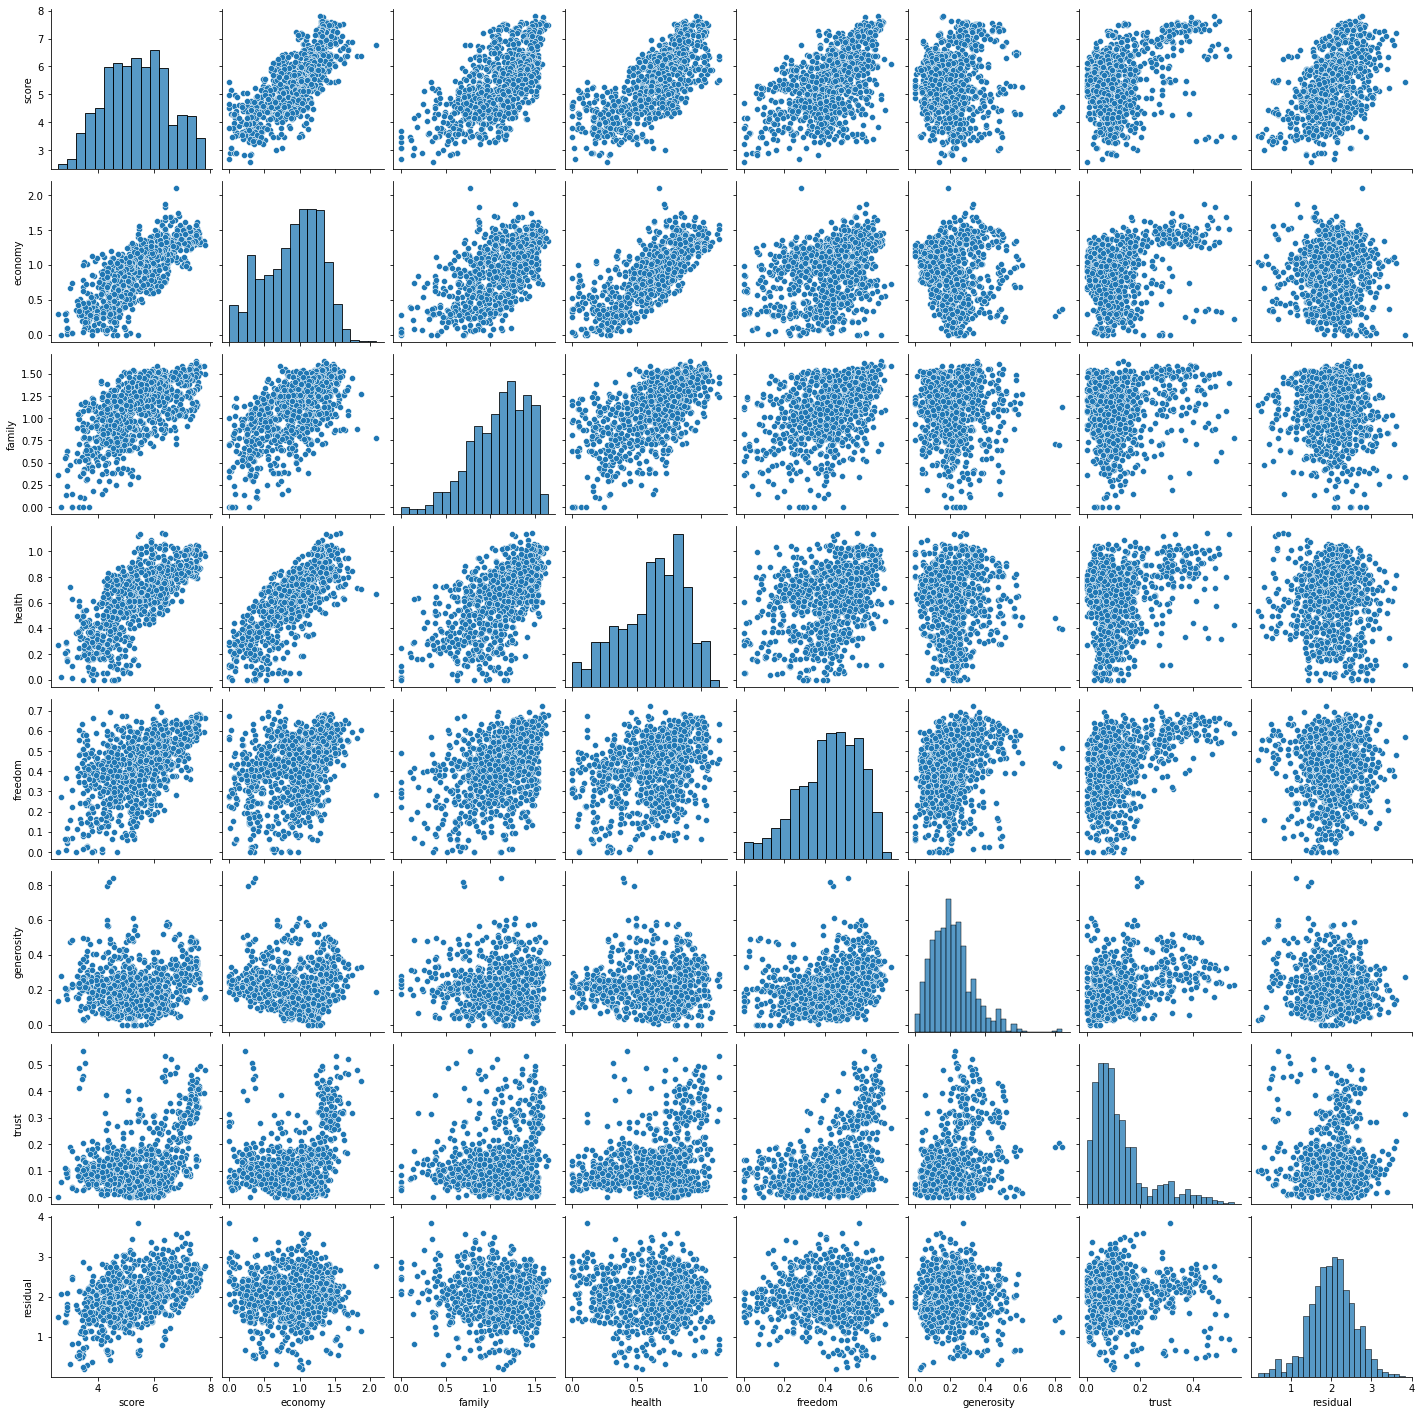

In [294]:
sns.pairplot(df_all.drop('rank', axis =1  ))

# 모델 학습

In [295]:
# 모델의 입출력을 정의하는 것이 첫 번째임

In [296]:
df_all.columns

Index(['year', 'rank', 'country', 'score', 'economy', 'family', 'health',
       'freedom', 'generosity', 'trust', 'residual'],
      dtype='object')

In [297]:
df_all.columns[3]

'score'

In [298]:
col_input = ['economy', 'family', 'health', 'freedom', 'generosity', 'trust']
col_output = 'score'

In [299]:
# 2015~2019년 데이터를 학습데이터로 쓰고 2020년 데이터를 테스트 데이터로 쓸 예정

In [300]:
df_all

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
0,2015,1,Switzerland,7.5870,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2.517380
1,2015,2,Iceland,7.5610,1.302320,1.402230,0.947840,0.628770,0.436300,0.141450,2.702010
2,2015,3,Denmark,7.5270,1.325480,1.360580,0.874640,0.649380,0.341390,0.483570,2.492040
3,2015,4,Norway,7.5220,1.459000,1.330950,0.885210,0.669730,0.346990,0.365030,2.465310
4,2015,5,Canada,7.4270,1.326290,1.322610,0.905630,0.632970,0.458110,0.329570,2.451760
...,...,...,...,...,...,...,...,...,...,...,...
930,2020,149,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
931,2020,150,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
932,2020,151,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
933,2020,152,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [301]:
df_train = df_all[df_all['year']!='2020']
df_test = df_all[df_all['year']=='2020']

In [302]:
X_train = df_train[col_input]
X_test = df_test[col_input]
y_train = df_train[col_output]
y_test = df_test[col_output]

In [303]:
# StandardScaler를 이용하여 표준화

In [304]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_norm = scaler.transform(X_train)
X_train = pd.DataFrame(X_norm, index = X_train.index, columns = X_train.columns)

X_norm = scaler.transform(X_test)
X_test = pd.DataFrame(X_norm, index = X_test.index, columns = X_test.columns)

# Regression Model 학습

In [305]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

ValueError: ignored

In [306]:
# 뭐여 결측치가 있으?
X_train.isna().sum()

#trust에 1이 있네

economy       0
family        0
health        0
freedom       0
generosity    0
trust         1
dtype: int64

In [307]:
X_test.isna().sum()

economy       0
family        0
health        0
freedom       0
generosity    0
trust         0
dtype: int64

In [308]:
X_train[X_train['trust'].isna()]

,economy,family,health,freedom,generosity,trust
489,2.898579,-0.918184,0.232055,-0.831841,-0.266485,NaN


In [309]:
df_all[df_all['trust'].isna()]

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
489,2018,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN,2.762


In [310]:
2.096	+0.776+	0.67+	0.284	+0.186+	2.762

6.773999999999999

In [311]:
# trust가 0이 었는데 이걸 결측치로 나타나게 된거임

# 그래서 0으로 채워줍시당

In [312]:
X_train.fillna(0, inplace=True)

In [313]:
X_train.isna().sum()

economy       0
family        0
health        0
freedom       0
generosity    0
trust         0
dtype: int64

In [314]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [315]:
# 모델학습결과 평가하기
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [316]:
pred = model_lr.predict(X_test)

print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

0.4411766043832984
0.5666831855845988


In [317]:
# xgboost 모델링
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

pred_xgb = model_xgb.predict(X_test)
print(mean_absolute_error(y_test, pred_xgb))
print(sqrt(mean_squared_error(y_test, pred_xgb)))

[06:45:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.4008115506377966
0.5032488531532971


# 심화분석

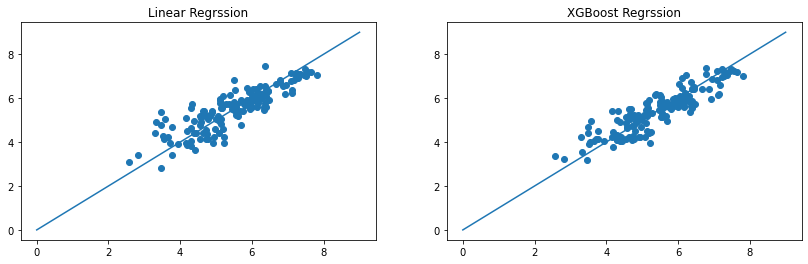

In [318]:
# y test vs pred 
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title('Linear Regrssion')
plt.plot([0,9], [0,9])
plt.scatter(y_test, pred)

plt.subplot(1,2,2)
plt.title('XGBoost Regrssion')
plt.plot([0,9], [0,9])
plt.scatter(y_test, pred_xgb)

plt.show()

In [319]:
# Linear Regression모델의 coefficient 시각화하기

<BarContainer object of 6 artists>

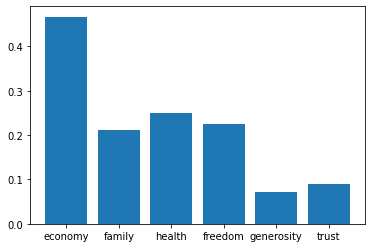

In [320]:
plt.bar(X_train.columns, model_lr.coef_)

In [321]:
# XGBoost 모델의  Feature importance 시각화

<BarContainer object of 6 artists>

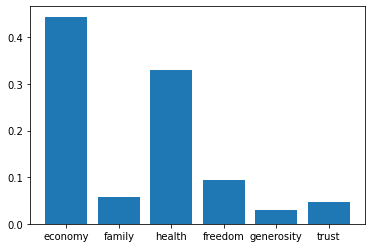

In [322]:
plt.bar(X_train.columns, model_xgb.feature_importances_)